## Part A

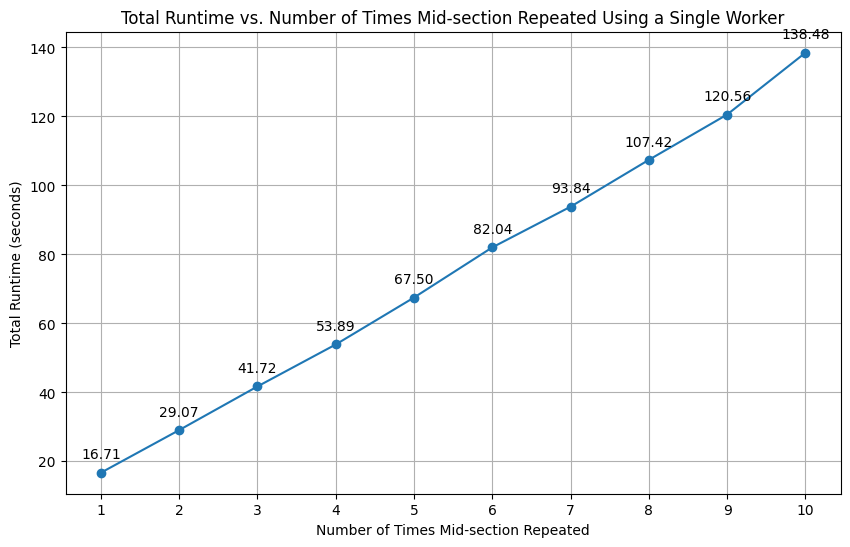

In [3]:
import matplotlib.pyplot as plt

# Data
repetitions = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
runtimes = ["0:16.71", "0:29.07", "0:41.72", "0:53.89", "1:07.5", "1:22.04", "1:33.84", "1:47.42", "2:00.56", "2:18.48"]

# Converting runtimes to seconds
converted_runtimes = []
for runtime in runtimes:
    minutes, seconds = runtime.split(':')
    total_seconds = int(minutes) * 60 + float(seconds)
    converted_runtimes.append(total_seconds)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(repetitions, converted_runtimes, marker='o')

# Adding y-values on the points
for i, txt in enumerate(converted_runtimes):
    plt.annotate(f"{txt:.2f}", (repetitions[i], converted_runtimes[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Total Runtime vs. Number of Times Mid-section Repeated Using a Single Worker')
plt.xlabel('Number of Times Mid-section Repeated')
plt.ylabel('Total Runtime (seconds)')
plt.xticks(repetitions)
plt.grid(True)
plt.show()


## Part B

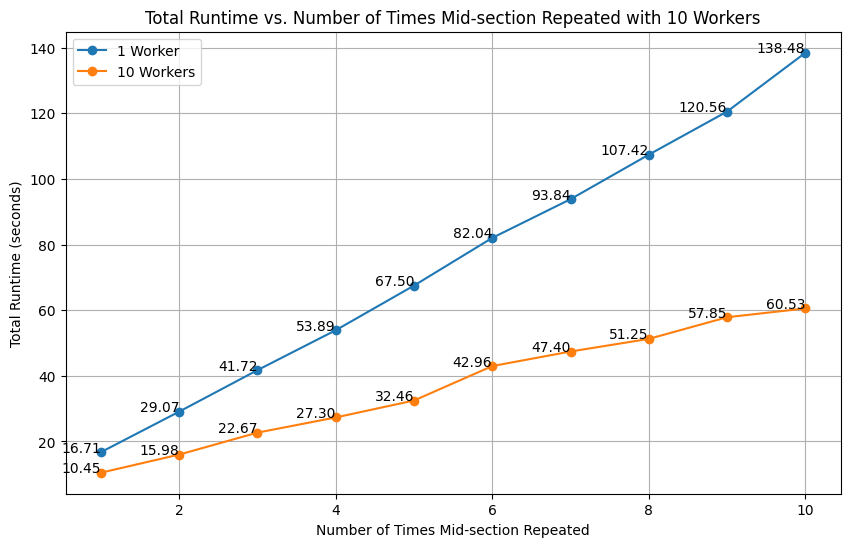

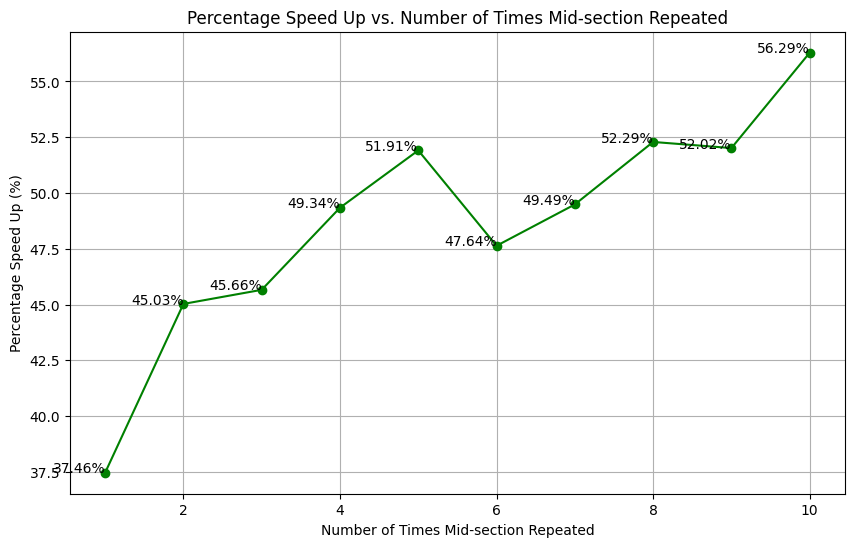

In [1]:
import matplotlib.pyplot as plt

# Data for the first line (single worker)
times_repeated_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
runtime_single_worker = [16.71, 29.07, 41.72, 53.89, 67.50, 82.04, 93.84, 107.42, 120.56, 138.48] # Converted to seconds

# Data for the second line (10 workers)
runtime_ten_workers = [10.45, 15.98, 22.67, 27.30, 32.46, 42.96, 47.40, 51.25, 57.85, 60.53] # Converted to seconds

# Calculating the percentage speed up
percentage_speedup = [((single - ten) / single) * 100 for single, ten in zip(runtime_single_worker, runtime_ten_workers)]

# Plot 1: Total Runtime vs. Number of Times Mid-section Repeated
plt.figure(figsize=(10, 6))
plt.plot(times_repeated_1, runtime_single_worker, label='1 Worker', marker='o')
plt.plot(times_repeated_1, runtime_ten_workers, label='10 Workers', marker='o')

# Annotating the points with total runtime
for i in range(len(times_repeated_1)):
    plt.text(times_repeated_1[i], runtime_single_worker[i], f'{runtime_single_worker[i]:.2f}', ha='right')
    plt.text(times_repeated_1[i], runtime_ten_workers[i], f'{runtime_ten_workers[i]:.2f}', ha='right')

# Labeling the plot
plt.xlabel('Number of Times Mid-section Repeated')
plt.ylabel('Total Runtime (seconds)')
plt.title('Total Runtime vs. Number of Times Mid-section Repeated with 10 Workers')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Percentage Speed Up vs. Number of Times Mid-section Repeated
plt.figure(figsize=(10, 6))
plt.plot(times_repeated_1, percentage_speedup, label='Speed Up (%)', marker='o', color='green')

# Annotating the points with percentage speed up
for i, speedup in enumerate(percentage_speedup):
    plt.text(times_repeated_1[i], speedup, f'{speedup:.2f}%', ha='right')

# Labeling the plot
plt.xlabel('Number of Times Mid-section Repeated')
plt.ylabel('Percentage Speed Up (%)')
plt.title('Percentage Speed Up vs. Number of Times Mid-section Repeated')
plt.grid(True)
plt.show()



The performance comparison between the single worker and multi-threaded scenarios is as follows:
- The multi-threaded scenario consistently shows a faster total runtime compared to the single worker setup across all runs.
The degree of speedup varies, but it is evident that having multiple workers significantly reduces the total runtime.
- The average speedup appears to be around 50%, which meets my expectation of improved performance due to distributed workload among multiple workers.
- The observed speedup aligns with my expectations for higher efficiency of multi-threading compared to single-worker scenario.

## Part C

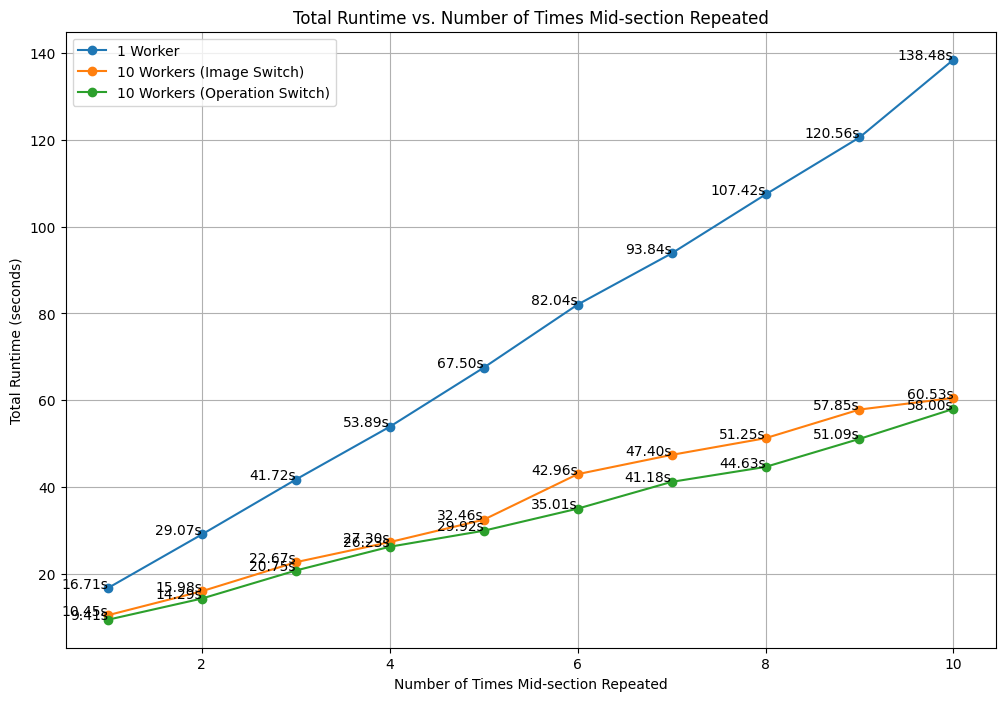

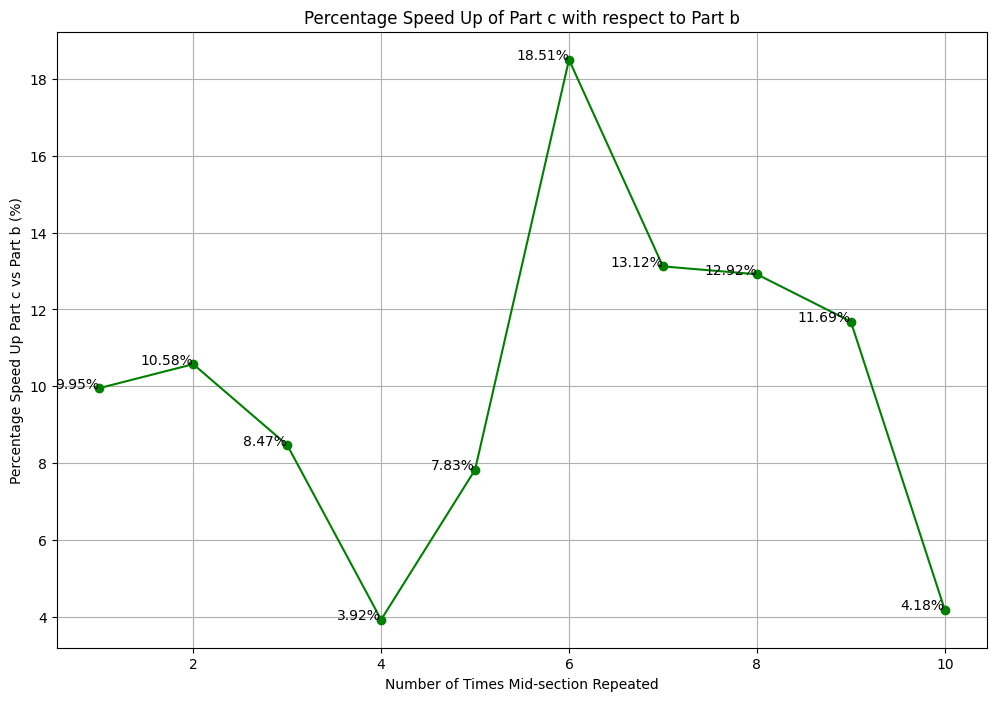

In [2]:
# Data for the third line (10 workers with operation switch)
runtime_ten_workers_op_switch = [9.41, 14.29, 20.75, 26.23, 29.92, 35.01, 41.18, 44.63, 51.09, 58.00] # Converted to seconds

# Calculating the percentage speed up of part c with respect to part b
percentage_speedup_c_vs_b = [abs((op_switch - worker10) / worker10) * 100 
                             for worker10, op_switch in zip(runtime_ten_workers, runtime_ten_workers_op_switch)]

# Plot 1: Total Runtime vs. Number of Times Mid-section Repeated for all three scenarios
plt.figure(figsize=(12, 8))
plt.plot(times_repeated_1, runtime_single_worker, label='1 Worker', marker='o')
plt.plot(times_repeated_1, runtime_ten_workers, label='10 Workers (Image Switch)', marker='o')
plt.plot(times_repeated_1, runtime_ten_workers_op_switch, label='10 Workers (Operation Switch)', marker='o')

# Annotating the points with total runtime
for i in range(len(times_repeated_1)):
    plt.text(times_repeated_1[i], runtime_single_worker[i], f'{runtime_single_worker[i]:.2f}s', ha='right')
    plt.text(times_repeated_1[i], runtime_ten_workers[i], f'{runtime_ten_workers[i]:.2f}s', ha='right')
    plt.text(times_repeated_1[i], runtime_ten_workers_op_switch[i], f'{runtime_ten_workers_op_switch[i]:.2f}s', ha='right')

# Labeling the plot
plt.xlabel('Number of Times Mid-section Repeated')
plt.ylabel('Total Runtime (seconds)')
plt.title('Total Runtime vs. Number of Times Mid-section Repeated')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Percentage Speed Up (Part c vs Part b) vs. Number of Times Mid-section Repeated
plt.figure(figsize=(12, 8))
plt.plot(times_repeated_1, percentage_speedup_c_vs_b, label='Speed Up Part c vs Part b (%)', marker='o', color='green')

# Annotating the points with percentage speed up
for i, speedup in enumerate(percentage_speedup_c_vs_b):
    plt.text(times_repeated_1[i], speedup, f'{speedup:.2f}%', ha='right')

# Labeling the plot
plt.xlabel('Number of Times Mid-section Repeated')
plt.ylabel('Percentage Speed Up Part c vs Part b (%)')
plt.title('Percentage Speed Up of Part c with respect to Part b')
plt.grid(True)
plt.show()



The runtime trend in part b (10 workers with image switching) vs part c (10 workers with operation switching) shows that operation switching leads to additional speedup compared to image switching. In image switching (part b), all operations are performed on one image before moving to the next, leading to frequent changes in the type of operation. However, in operation switching (part c), the server processes the same operation across different images before switching operations, which reduces the overhead associated with changing operation types, making the use of resources more efficient and thereby faster runtimes.

## Part D
One possible scheduling strategy for the server to achieve consistent performance across different experiments is First Ready First-Come-First-Serve (FR-FCFS). This scheduler policy prioritizes requests based on their readiness for processing, irrespective of the nature of the operation or the image. The queue is managed so that as soon as a request becomes ready (all prerequisites met and resources available), it is prioritized for execution. I believe this approach ensures the server efficiently handles requests without unnecessary delays, balancing the need for order and speed. By focusing on the readiness of tasks rather than their arrival order or type, this strategy aims to maintain consistent performance levels, whether the server is switching between images or operations, thereby optimizing throughput in a multi-threaded environment.